In [2]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
data.columns = ['label', 'body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
data['text_len'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))
data.head()

,label,body_text,text_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [5]:
import string

def perc_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count / (len(text) - text.count(" "))), 3)*100

data['punct%'] = data['body_text'].apply(lambda x : perc_punct(x))
data.head()

,label,body_text,text_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [7]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

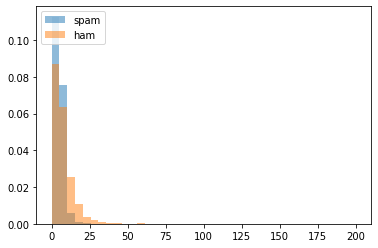

In [11]:
bins = np.linspace(0, 200, 40)


pyplot.hist(data[data['label'] == 'spam']['text_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['text_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

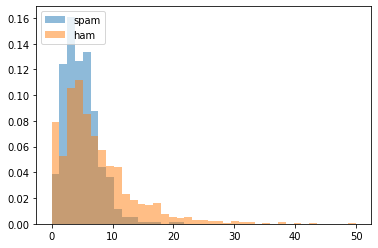

In [12]:
bins = np.linspace(0, 50, 40)


pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()